In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\freri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\freri\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#loading in the dataset, seperating the features and the target classes, and splitting the data into training and testing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#0 = healthy
#1 = IBD

#Run the top 2 lines for the relative abundances, and the bottom 2 for the GO terms
df = pd.read_csv("Relative_abundances_processed.csv")
df = df.drop(["run_id", "Candidatus_Melainabacteria", "Chlamydiae"], axis=1)
#df = pd.read_csv("GO_terms_processed.csv")
#df = df.drop(["run_id"], axis=1)

df

,Acidobacteria,Actinobacteria,Bacteroidetes,Candidatus_Cloacimonetes,Chloroflexi,Cyanobacteria,Elusimicrobia,Fibrobacteres,Firmicutes,Fusobacteria,...,Ignavibacteriae,Kiritimatiellaeota,Lentisphaerae,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Unassigned,Verrucomicrobia,phenotype
0,0.000000,0.058540,0.116615,0.0,0.000000,0.000233,0.000000,0.000466,0.706910,0.000543,...,0.000000,0.000466,0.000000,0.008696,0.000000,0.000000,0.000543,0.103183,0.002407,0
1,0.000165,0.019153,0.069662,0.0,0.000083,0.000083,0.000000,0.001076,0.804004,0.000786,...,0.000165,0.000000,0.000000,0.006122,0.000124,0.000083,0.001200,0.080913,0.016174,0
2,0.000356,0.011220,0.168121,0.0,0.000000,0.003087,0.001722,0.001009,0.656812,0.000178,...,0.000000,0.000237,0.000712,0.054497,0.000059,0.000000,0.018937,0.078421,0.004571,0
3,0.000296,0.028528,0.164553,0.0,0.000148,0.000148,0.000049,0.001185,0.650363,0.000247,...,0.000049,0.000099,0.002468,0.013030,0.000000,0.000000,0.010315,0.108040,0.020483,0
4,0.000071,0.016804,0.215537,0.0,0.000142,0.000000,0.000000,0.000498,0.626104,0.000427,...,0.000071,0.000071,0.000000,0.010396,0.000071,0.000142,0.000142,0.126673,0.002635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,0.000000,0.020191,0.399371,0.0,0.000131,0.000131,0.000000,0.000131,0.400420,0.000656,...,0.000000,0.000000,0.000000,0.008785,0.000000,0.000000,0.000000,0.168612,0.001573,1
642,0.000000,0.029555,0.278340,0.0,0.000000,0.000607,0.000000,0.000202,0.592105,0.000405,...,0.000000,0.000000,0.000000,0.004858,0.000202,0.000000,0.000000,0.091296,0.002429,1
643,0.000000,0.011503,0.000402,0.0,0.000000,0.000000,0.000000,0.000000,0.042146,0.000000,...,0.000000,0.000000,0.000000,0.389461,0.000000,0.000000,0.000000,0.556337,0.000000,1
644,0.000000,0.228571,0.013919,0.0,0.000000,0.000000,0.000000,0.000000,0.263736,0.000733,...,0.000000,0.000000,0.000000,0.166300,0.000000,0.000000,0.000000,0.325275,0.000733,1


In [3]:
#Separate features and target (replace target with correct column name)
X = df.drop('phenotype', axis=1)
y = df['phenotype']  

# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Check the shapes to ensure the split worked as expected
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (484, 20) (484,)
Test set shape: (162, 20) (162,)


In [4]:
#Set the grid to search over, perform the grid search, and fit the model with the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Set the grid
max_features_range = np.arange(2,22,2)  #for the relative abundances
#max_features_range = np.arange(5,85,5) #for the GO terms
max_depth_range = np.arange(5,51,5)
param_grid = {'max_features': max_features_range,
              'max_depth': max_depth_range}

#Perform the grid search and fit the model with th best parameters on the training data
#The model trains relatively fast with 50 estimators and gives good results with that as well,so 50 is likely a good starting point
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=50), param_grid, cv=5,scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                         'max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
             scoring='roc_auc')


In [6]:
#Print the best parameters, and see how the model performed on the training and testing data
from sklearn.metrics import roc_auc_score

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation AUC score: {:.2f}".format(grid_search.best_score_))

print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])))
print("Test accuracy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': 15, 'max_features': 2}
Best cross-validation AUC score: 0.87
Test set AUC: 0.889
Test accuracy: 0.89


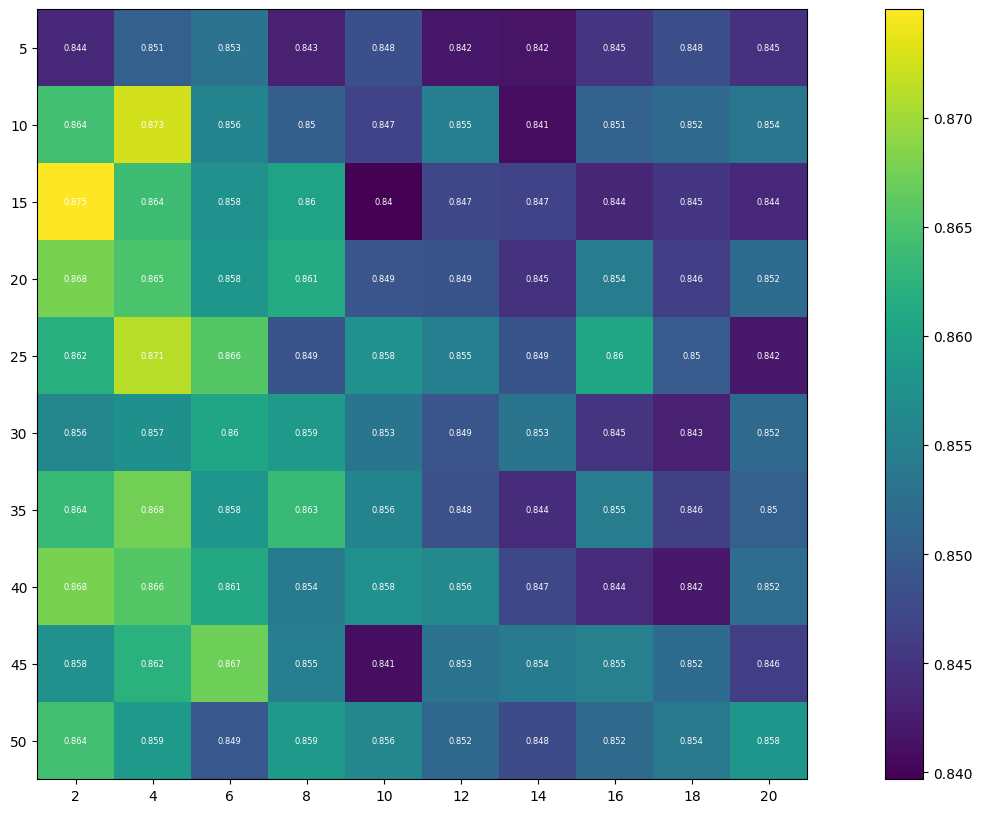

In [7]:
#Make a heatmap of the gridsearch parameters
#Allows for iterative refinement of the search space

#convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

#Make the heatmap
scores = np.array(results.mean_test_score).reshape(len(max_depth_range), len(max_features_range))
plt.figure(figsize=(20,10))
plt.imshow(scores)
plt.colorbar() 
plt.xticks(ticks=[x for x in range(len(max_features_range))],labels=max_features_range) 
plt.yticks(ticks=[x for x in range(len(max_depth_range))], labels=max_depth_range)

#Add the scores in each square
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.text(j, i, scores[i, j].round(3), ha="center", va="center", color="white", fontsize=6)

plt.show()


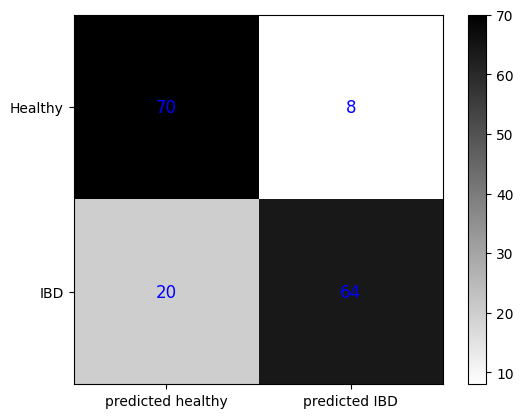

In [8]:
#Make the confusion matrix of the best performing gridsearch model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, grid_search.predict(X_test))

#Make the confusion matrix as a heatmap
plt.imshow(cm,cmap=plt.cm.gray_r)
plt.colorbar() 
plt.xticks(ticks=[0,1],labels=["predicted healthy", "predicted IBD"]) 
plt.yticks(ticks=[0,1], labels=["Healthy", "IBD"])

#Add the numbers of each category in the squares
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="blue", fontsize=12)
        
plt.show()

In [9]:
#Print the f-statistics of the best performing gridsearch model
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test),
target_names=["Healthy", "IBD"]))

              precision    recall  f1-score   support

     Healthy       0.78      0.90      0.83        78
         IBD       0.89      0.76      0.82        84

    accuracy                           0.83       162
   macro avg       0.83      0.83      0.83       162
weighted avg       0.84      0.83      0.83       162



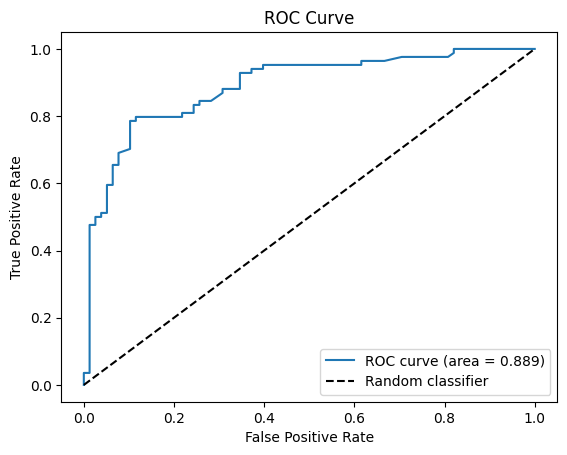

In [10]:
#Draw the ROC cuve of the best performing gridsearch model and determine the corresponding AUC value
from sklearn.metrics import roc_curve
y_pred_prob = grid_search.predict_proba(X_test)[:, 1] 


#make the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

#Plot the ROC curve and the dashed diagonal line at y=x
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc) # Plot the ROC curve 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') # roc curve for tpr = fpr  
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()


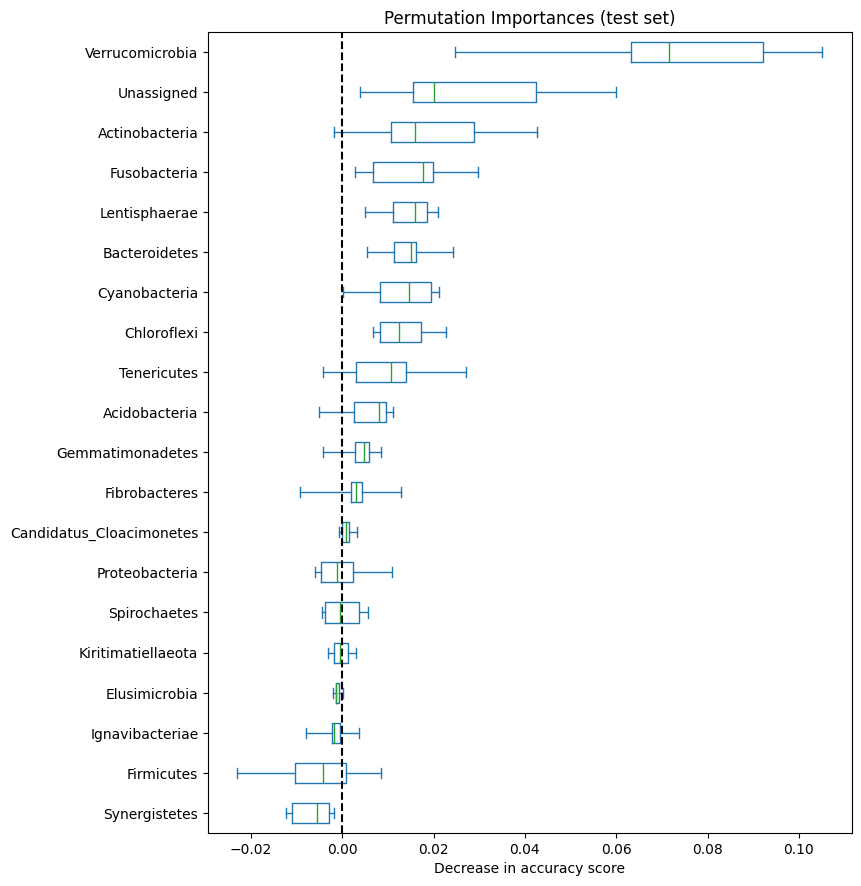

In [12]:
#Performs 10 rounds of permutation feature importance on each feature
from sklearn.inspection import permutation_importance
result = permutation_importance(
    grid_search, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

#Sorts the feature importances values
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

#Draw the graph and sets the 
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
fig = ax.get_figure()
fig.tight_layout()

#Set the figure size to what is required for a legible graph (important for the GO terms)
fig.set_size_inches(10, 10)

In [ ]:
'''
Permutation feature importance can have problems when features are highly correlated with each other,
as this will show both of the correlated featues to be less important. To get an insight into the degree of correlation
heirarchical clustering can be used. Then, for each group of highly correlated features 1 can be chosen 
and the rest can be removed. New feature importances should then give more accurate insight in how 
important those features are as a group. For more detail see: 
https://scikit-learn.org/1.5/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py
'''

In [ ]:
'''
All of the code below was not written by me but adapted from:
https://scikit-learn.org/1.5/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py
'''

In [13]:
#To run the code below first run this one
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=2, n_estimators=50)

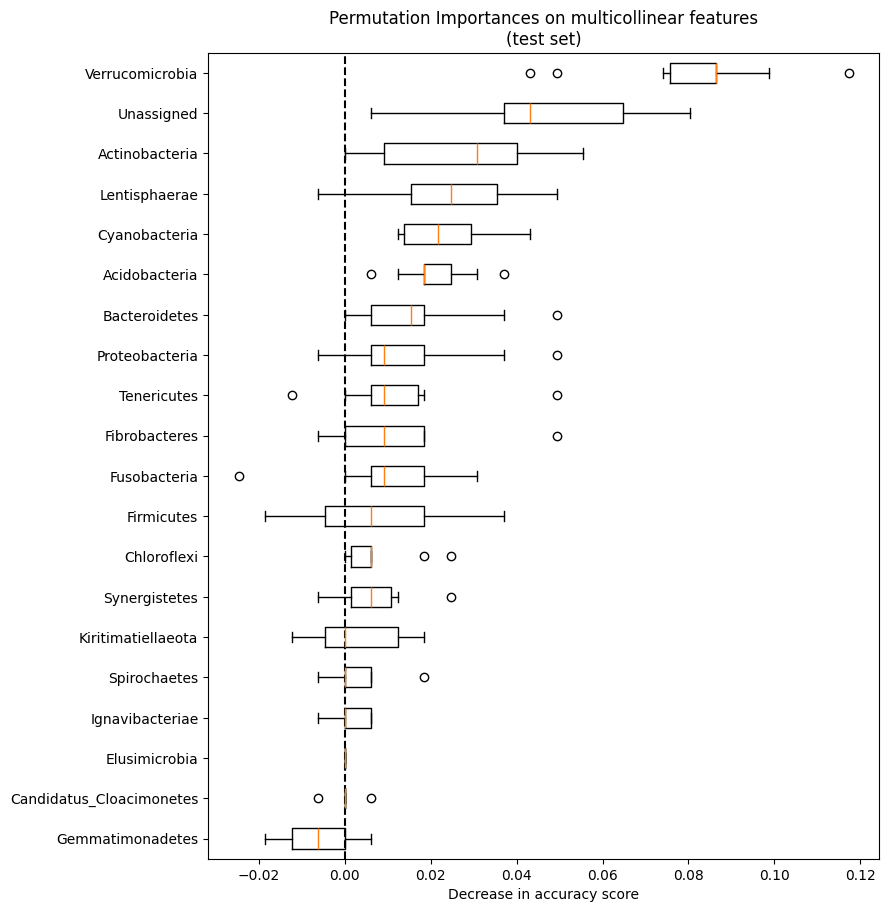

In [17]:
#Performs standard feature permutation importances as above, so it should give similar results

import matplotlib

from sklearn.inspection import permutation_importance
from sklearn.utils.fixes import parse_version


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        if parse_version(matplotlib.__version__) >= parse_version("3.9")
        else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf, X_test, y_test, ax)
ax.set_title("Permutation Importances on multicollinear features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

fig = ax.get_figure()
fig.tight_layout()

#Set the figure size to what is required for a legible graph (especially important for the GO terms)
fig.set_size_inches(10, 10)

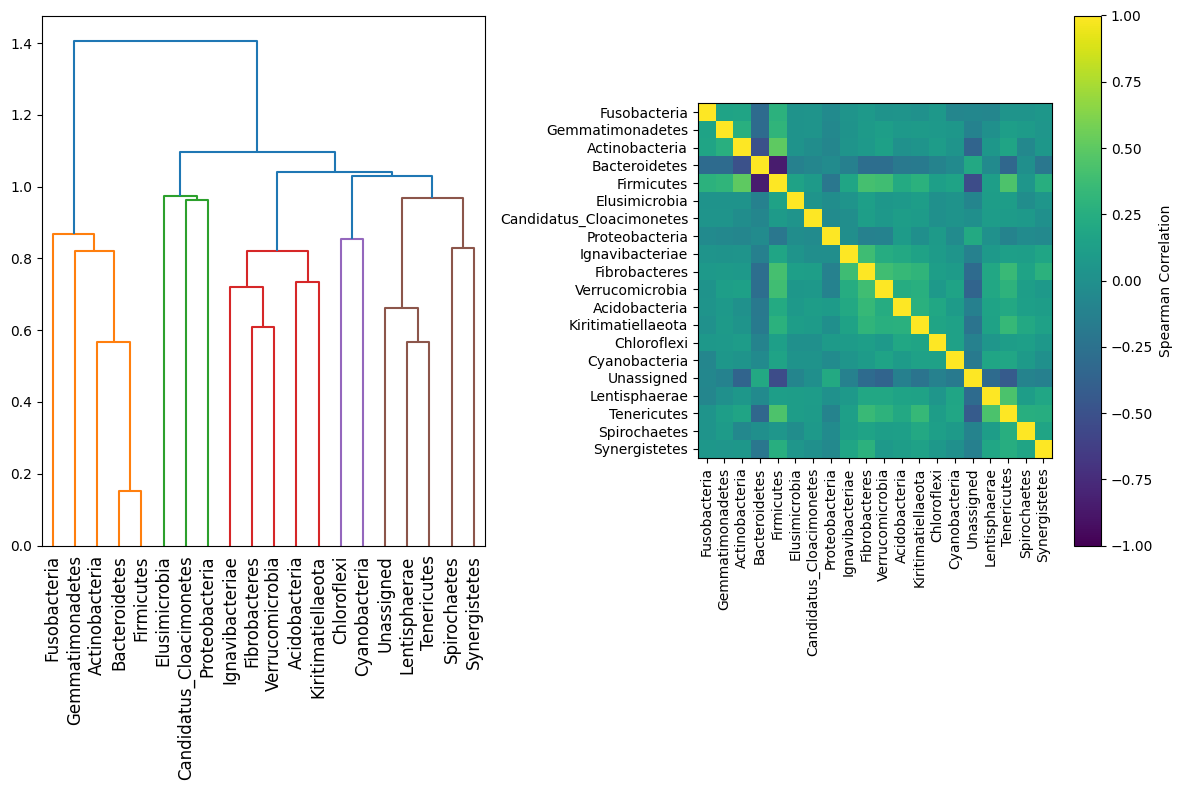

In [18]:
#Performs the heirarchical clustering, and shows the dendogram as well as the correlation matrix

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

im = ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=ax2, orientation="vertical")
cbar.set_label("Spearman Correlation")
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

Baseline accuracy on test data with features removed: 0.64


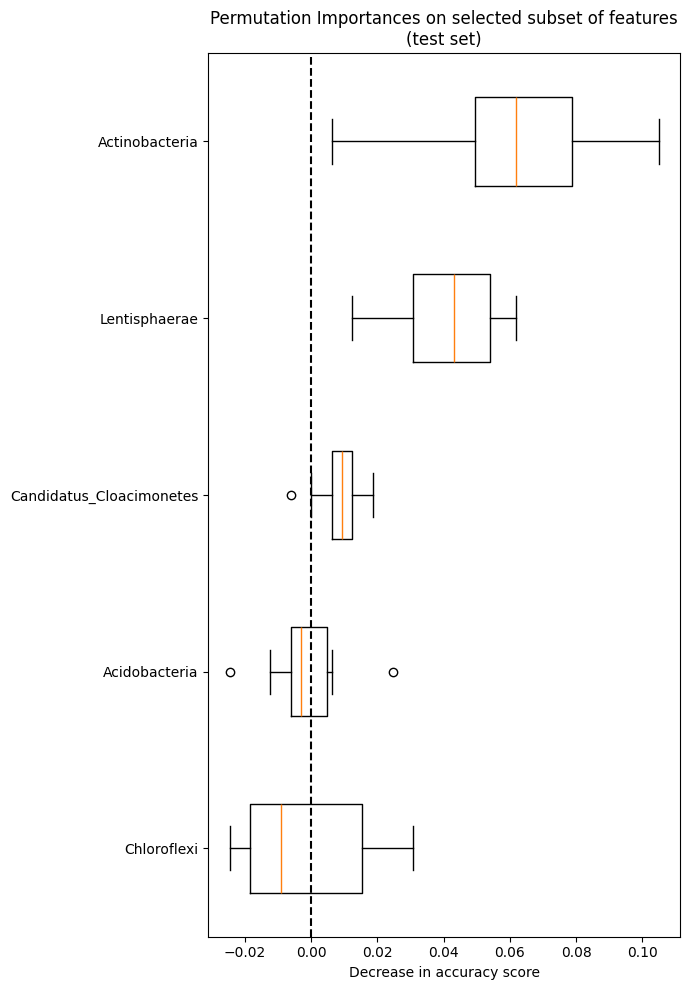

In [19]:
#Removes al features but 1 from a group of features correlated to a degree specified by the cutoff score
#Then trains a new forest from this dataset, computes, the new accuracy of this dataset, and generates the new feature importances
from collections import defaultdict

#The number in this is the cutoff score
cluster_ids = hierarchy.fcluster(dist_linkage, 0.99, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]

X_train_sel = X_train[selected_features_names]
X_test_sel = X_test[selected_features_names]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Baseline accuracy on test data with features removed:"
    f" {clf_sel.score(X_test_sel, y_test):.2}"
)

fig, ax = plt.subplots(figsize=(7, 10)) #change this is the graph is illegible
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()